# Preprocesamiento

In [16]:
import pandas as pd
import tensorflow
import numpy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [17]:
df = pd.read_csv('CIDDS-001-external-week1.csv')

In [18]:
df.head()

,Date first seen,Duration,Proto,Src IP Addr,Src Pt,Dst IP Addr,Dst Pt,Packets,Bytes,Flows,Flags,Tos,class,attackType,attackID,attackDescription
0,2017-03-14 17:43:57.172,81412.697,TCP,EXT_SERVER,8082,OPENSTACK_NET,56978.0,3057,2.1 M,1,.AP...,0,normal,---,---,---
1,2017-03-14 17:43:57.172,81412.697,TCP,OPENSTACK_NET,56978,EXT_SERVER,8082.0,4748,2.5 M,1,.AP...,0,normal,---,---,---
2,2017-03-14 17:43:26.135,81504.787,TCP,EXT_SERVER,8082,OPENSTACK_NET,56979.0,8639,9.1 M,1,.AP...,0,normal,---,---,---
3,2017-03-14 17:43:26.135,81504.787,TCP,OPENSTACK_NET,56979,EXT_SERVER,8082.0,12024,10.3 M,1,.AP...,0,normal,---,---,---
4,2017-03-14 18:17:09.005,82100.692,TCP,EXT_SERVER,8082,OPENSTACK_NET,51649.0,11012,27.2 M,1,.AP.S.,0,normal,---,---,---


In [19]:
df.columns

Index(['Date first seen', 'Duration', 'Proto', 'Src IP Addr', 'Src Pt',
       'Dst IP Addr', 'Dst Pt', 'Packets', 'Bytes', 'Flows', 'Flags', 'Tos',
       'class', 'attackType', 'attackID', 'attackDescription'],
      dtype='object')

In [20]:
df.isnull().sum()


,0
Date first seen,0
Duration,0
Proto,0
Src IP Addr,0
Src Pt,0
Dst IP Addr,0
Dst Pt,0
Packets,0
Bytes,0
Flows,0


<Axes: xlabel='class', ylabel='count'>

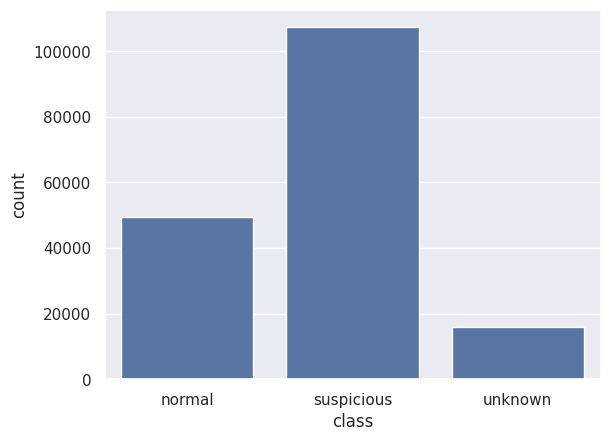

In [21]:
sns.countplot(x = "class",data=df)

In [22]:
df["A"]=0
df["P"]=0
df["S"]=0
df["R"]=0
df["F"]=0
df["x"]=0

def set_flag(data,check):
    val=0;
    if(check in list(data["Flags"])):
        val = 1 ;
    return val

In [23]:
df["A"] = df.apply(set_flag,check ="A", axis = 1)
df["P"] = df.apply(set_flag,check = "P" ,axis = 1)
df["S"] = df.apply(set_flag,check ="S",axis = 1)
df["R"] = df.apply(set_flag,check="R" ,axis = 1)
df["F"] = df.apply(set_flag,check ="F" ,axis = 1)
df["x"] = df.apply(set_flag,check ="x" ,axis = 1)

In [24]:
df=df.drop(columns = ["Date first seen","attackType","attackID","attackDescription","Flows","Tos","Flags"])

In [25]:
df.head()


,Duration,Proto,Src IP Addr,Src Pt,Dst IP Addr,Dst Pt,Packets,Bytes,class,A,P,S,R,F,x
0,81412.697,TCP,EXT_SERVER,8082,OPENSTACK_NET,56978.0,3057,2.1 M,normal,1,1,0,0,0,0
1,81412.697,TCP,OPENSTACK_NET,56978,EXT_SERVER,8082.0,4748,2.5 M,normal,1,1,0,0,0,0
2,81504.787,TCP,EXT_SERVER,8082,OPENSTACK_NET,56979.0,8639,9.1 M,normal,1,1,0,0,0,0
3,81504.787,TCP,OPENSTACK_NET,56979,EXT_SERVER,8082.0,12024,10.3 M,normal,1,1,0,0,0,0
4,82100.692,TCP,EXT_SERVER,8082,OPENSTACK_NET,51649.0,11012,27.2 M,normal,1,1,1,0,0,0


<Axes: xlabel='S', ylabel='count'>

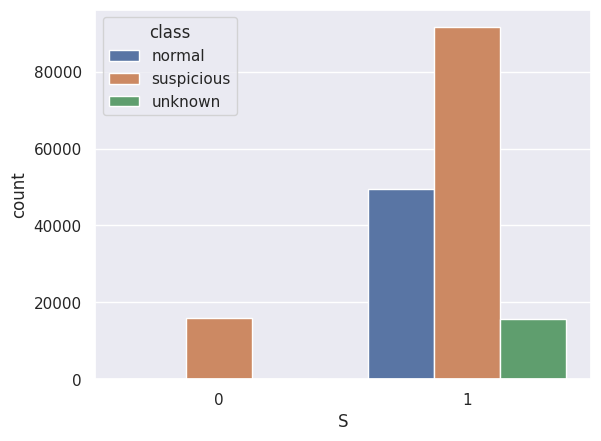

In [26]:
sns.countplot(x="S",hue = "class",data=df)

In [27]:
import re
def convtonum(data):
    num1=data["Bytes"]
    if "M" in data["Bytes"]:
        num=re.findall("[0-9.0-9]",data["Bytes"])
        num1 = float("".join(num))*100000
    num1 = float(num1)
    return num1

In [28]:
df["Bytes"] = df.apply(convtonum,axis = 1)

In [29]:
df.head()

,Duration,Proto,Src IP Addr,Src Pt,Dst IP Addr,Dst Pt,Packets,Bytes,class,A,P,S,R,F,x
0,81412.697,TCP,EXT_SERVER,8082,OPENSTACK_NET,56978.0,3057,210000.0,normal,1,1,0,0,0,0
1,81412.697,TCP,OPENSTACK_NET,56978,EXT_SERVER,8082.0,4748,250000.0,normal,1,1,0,0,0,0
2,81504.787,TCP,EXT_SERVER,8082,OPENSTACK_NET,56979.0,8639,910000.0,normal,1,1,0,0,0,0
3,81504.787,TCP,OPENSTACK_NET,56979,EXT_SERVER,8082.0,12024,1030000.0,normal,1,1,0,0,0,0
4,82100.692,TCP,EXT_SERVER,8082,OPENSTACK_NET,51649.0,11012,2720000.0,normal,1,1,1,0,0,0


In [30]:
from sklearn.preprocessing import LabelEncoder
col = ["Proto","class","Src IP Addr","Dst IP Addr"]
enc = LabelEncoder()
for col_name in col:
    df[col_name]=enc.fit_transform(df[col_name])

<Axes: >

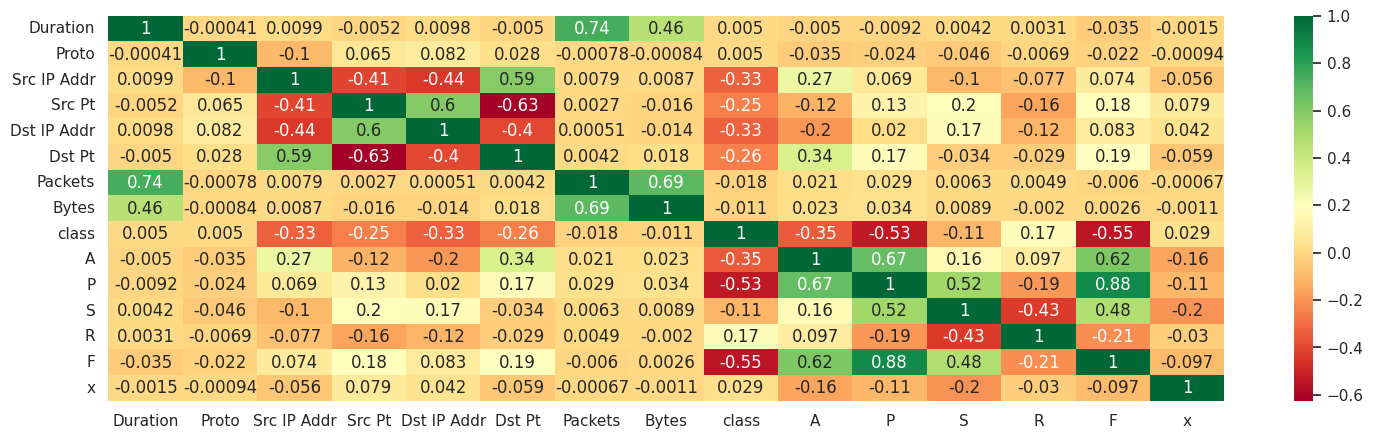

In [31]:
data1 = df.copy()
plt.figure(figsize=(18,5))
sns.heatmap(data1.corr(),annot=True,cmap = "RdYlGn")

# Modelo

In [32]:
data_y = data1["class"]
data_x = data1.drop(columns = ["class"])

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.3, random_state=1)

In [34]:
#decision-tree-classifier - single-tree-classifier  // using all features

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion="entropy", max_depth=10) # you can use GINI index also here as a critirion
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

# Metrica

Matriz de Confusión:
 [[14725     1     0]
 [    1 32300    12]
 [    0    11  4802]]


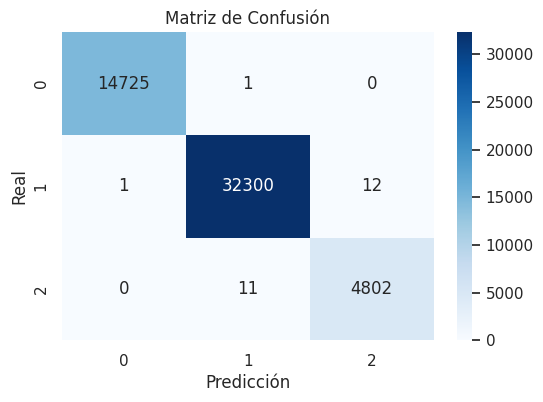


Accuracy: 0.9995178585204042

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     14726
           1       1.00      1.00      1.00     32313
           2       1.00      1.00      1.00      4813

    accuracy                           1.00     51852
   macro avg       1.00      1.00      1.00     51852
weighted avg       1.00      1.00      1.00     51852



In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Entrenamiento del modelo
clf = DecisionTreeClassifier(criterion="entropy", max_depth=10)
clf.fit(X_train, y_train)

# Predicción
y_pred = clf.predict(X_test)

# --- Matriz de confusión ---
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:\n", cm)

# Visualización (opcional)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# --- Métricas ---
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


# Pipeline

In [40]:
import pandas as pd
import re
import joblib
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# ---------------------------------------------------
# 1. LOAD DATA
# ---------------------------------------------------
df = pd.read_csv("CIDDS-001-external-week1.csv")

# ---------------------------------------------------
# 2. FLAG EXTRACTION (A, P, S, R, F, x)
# ---------------------------------------------------
df["A"] = 0
df["P"] = 0
df["S"] = 0
df["R"] = 0
df["F"] = 0
df["x"] = 0

def set_flag(row, flag):
    return 1 if flag in str(row["Flags"]) else 0

for flag in ["A", "P", "S", "R", "F", "x"]:
    df[flag] = df.apply(lambda r: set_flag(r, flag), axis=1)

# ---------------------------------------------------
# 3. DROP UNUSED COLUMNS
# ---------------------------------------------------
df = df.drop(columns=[
    "Date first seen", "attackType", "attackID",
    "attackDescription", "Flows", "Tos", "Flags"
])

# ---------------------------------------------------
# 4. CONVERTIR BYTES A NÚMEROS (2.1 M → 2100000)
# ---------------------------------------------------
def conv_bytes(row):
    val = row["Bytes"]
    if pd.isna(val):
        return 0.0
    val = str(val)
    if "M" in val:
        num = re.findall(r"[0-9.]+", val)
        return float("".join(num)) * 1_000_000
    elif "K" in val:
        num = re.findall(r"[0-9.]+", val)
        return float("".join(num)) * 1_000
    else:
        return float(val)

df["Bytes"] = df.apply(conv_bytes, axis=1)

# ---------------------------------------------------
# 5. LABEL ENCODING A COLUMNAS CATEGÓRICAS
# ---------------------------------------------------
label_cols = ["Proto", "class", "Src IP Addr", "Dst IP Addr"]
encoders = {}

for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    encoders[col] = le

# ---------------------------------------------------
# 6. SEPARAR X Y Y
# ---------------------------------------------------
X = df.drop(columns=["class"])
y = df["class"]

# ---------------------------------------------------
# 7. TRAIN / TEST SPLIT
# ---------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1
)

# ---------------------------------------------------
# 8. TRAINING
# ---------------------------------------------------
clf = DecisionTreeClassifier(criterion="entropy", max_depth=10)
clf.fit(X_train, y_train)

# ---------------------------------------------------
# 9. EVALUATION
# ---------------------------------------------------
y_pred = clf.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average="weighted"))
print("Recall:", recall_score(y_test, y_pred, average="weighted"))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ---------------------------------------------------
# 10. SAVE PIPELINE
# ---------------------------------------------------
pipeline = {
    "model": clf,
    "encoders": encoders,
    "features": X.columns.tolist(),
    "flag_columns": ["A", "P", "S", "R", "F", "x"],
    "conv_bytes": conv_bytes,
    "set_flag": set_flag
}

joblib.dump(pipeline, "suspicious_logs.pkl")
print("\n✅ Pipeline guardado como suspicious_logs.pkl")


Accuracy: 0.9995178585204042
Precision: 0.9995178662790714
Recall: 0.9995178585204042

Confusion Matrix:
 [[14725     1     0]
 [    0 32301    12]
 [    0    12  4801]]

✅ Pipeline guardado como suspicious_logs.pkl


In [44]:
import pandas as pd
import joblib
import numpy as np

# ---------------------------------------------------
# CARGAR PIPELINE GUARDADO
# ---------------------------------------------------
def load_model():
    pipeline = joblib.load("suspicious_logs.pkl")
    return pipeline

# ---------------------------------------------------
# FUNCION DE INFERENCIA
# ---------------------------------------------------
def predict_new_data(pipeline, sample):
    model = pipeline["model"]
    encoders = pipeline["encoders"]
    features = pipeline["features"]
    set_flag = pipeline["set_flag"]
    conv_bytes = pipeline["conv_bytes"]

    # Convertir el sample a DataFrame
    df = pd.DataFrame([sample])

    # Agregar columnas de flags
    for flag in ["A", "P", "S", "R", "F", "x"]:
        df[flag] = df.apply(lambda r: set_flag(r, flag), axis=1)

    # Eliminar columnas no usadas
    unused = ["Date first seen", "attackType", "attackID", "attackDescription", "Flows", "Tos", "Flags"]
    df = df.drop(columns=[col for col in unused if col in df.columns])

    # Convertir Bytes
    df["Bytes"] = df.apply(conv_bytes, axis=1)

    # Aplicar encoders
    for col in ["Proto", "Src IP Addr", "Dst IP Addr"]:
        if col in df.columns:
            df[col] = df[col].astype(str).map(
                lambda x: encoders[col].transform([x])[0] if x in encoders[col].classes_ else -1
            )

    # Asegurar el mismo orden y conjunto de columnas que en entrenamiento
    df = df.reindex(columns=features, fill_value=0)

    # Predicción
    predictions = model.predict(df)
    return predictions[0]

# ---------------------------------------------------
# EJEMPLO DE USO
# ---------------------------------------------------
if __name__ == "__main__":
    model = load_model()

    # Modified sample to match the expected input structure for preprocessing
    sample = {
        "Date first seen": "2017-03-14 17:43:57.172",
        "Duration": 81412.697,
        "Proto": "TCP",
        "Src IP Addr": "EXT_SERVER",
        "Src Pt": 8082,
        "Dst IP Addr": "OPENSTACK_NET",
        "Dst Pt": 56978.0,
        "Packets": 3057,
        "Bytes": "2.1 M", # Original format as string
        "Flows": 1,
        "Flags": ".AP...", # Added the missing 'Flags' key
        "Tos": 0,
        "attackType": "---",
        "attackID": "---",
        "attackDescription": "---"
    }

    result = predict_new_data(model, sample)
    print(f"Predicted class: {model['encoders']['class'].inverse_transform([result])[0]}")


Predicted class: normal
